<a href="https://colab.research.google.com/github/Zaccah/aml22-rl/blob/train_image/Alb_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable_baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.5 MB/s eta 0:00:00
  Using cached libtorrent-2.0.7-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (8.6 MB)
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616821 sha256=4b4eabeec143e86453532ebeadc04e0aec72a96ac54bd68bb8b5d29f9a00fe09
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab

In [2]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

!pip install gym
!pip install free-mujoco-py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.18).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 21 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/univ

In [3]:
!unzip custom_hopper.zip

Archive:  custom_hopper.zip
   creating: env/
  inflating: env/__init__.py         
  inflating: env/custom_hopper.py    
  inflating: env/mujoco_env.py       
   creating: env/assets/
  inflating: env/assets/hopper.xml   


In [4]:
import gym
from env.custom_hopper import *
from stable_baselines3 import PPO
import numpy as np

Compiling /usr/local/lib/python3.8/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.8/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8/usr
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8/usr/local
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8/usr/local/lib
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuexten

Wrappers library

In [6]:
from gym.wrappers.pixel_observation import PixelObservationWrapper
from gym import spaces

environment

In [9]:
env = gym.make('CustomHopper-source-v0')
env.reset()
print("The observation space: {}".format(env.observation_space))

Frame_env = gym.wrappers.FrameStack(env, 4)
print("The observation space: {}".format(Frame_env.observation_space)) #concatene 4 observation space

Pixel_env= PixelObservationWrapper(env)
print("The observation space: {}".format(Pixel_env.observation_space)) #give us the value of the pixel

Frame_Pixel_env=PixelObservationWrapper(Frame_env,pixels_only=True, render_kwargs=None, pixel_keys=("pixels",)) #give us the value of the pixel
print("The observation space: {}".format(Frame_Pixel_env.observation_space)) #concatene 4 observation space + give us the value of the pixel

The observation space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
The observation space: Box([[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]], [[inf inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf inf]], (4, 11), float64)
The observation space: Dict(pixels:Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

False

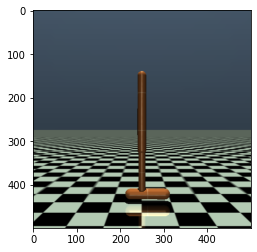

In [10]:
env_screen = Frame_Pixel_env.render(mode = 'rgb_array')
env.close()

import matplotlib.pyplot as plt 
plt.imshow(env_screen)

In [18]:
model = PPO('CnnPolicy', Frame_Pixel_env) # initialize the model with the CnnLstmPolicy class


ValueError: ignored